11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.8716 - loss: 0.4256 - val_accuracy: 0.9828 - val_loss: 0.0584
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9807 - loss: 0.0628 - val_accuracy: 0.9863 - val_loss: 0.0512
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9900 - val_loss: 0.0369
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9875 - val_loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9848 - loss: 0.0439
Test accuracy: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


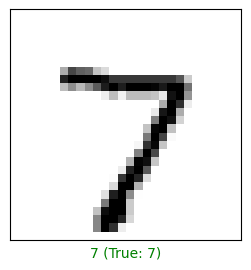

In [1]:
# image_classification_mnist.ipynb

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# 1. Φόρτωση δεδομένων
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Κανονικοποίηση και reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Δημιουργία μοντέλου CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile & Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 5. Αξιολόγηση
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# 6. Προβλέψεις
predictions = model.predict(x_test)

# 7. Δείξε δείγμα εικόνας με πρόβλεψη
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array[i])
    color = 'green' if predicted_label == true_label[i] else 'red'
    plt.xlabel(f"{predicted_label} (True: {true_label[i]})", color=color)

plt.figure(figsize=(6,3))
plot_image(0, predictions, y_test, x_test)
plt.show()
